<a href="https://colab.research.google.com/github/SHREYANSH-BARDIA/Deep_Learners_Recursion2.0/blob/main/Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importing dataset
data = pd.read_csv('/content/drive/MyDrive/Recursion 2.0/heart.csv')

In [5]:
from collections import Counter
import pandas_profiling as pp

In [143]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn import linear_model, ensemble, metrics, tree, neighbors
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import classification_report,accuracy_score as acc,confusion_matrix

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
data['sex'] = data['sex'].astype('str')
data['cp'] = data['cp'].astype('str')
data['fbs'] = data['fbs'].astype('str')
data['restecg'] = data['restecg'].astype('str')
data['exang'] = data['exang'].astype('str')
data['slope'] = data['slope'].astype('str')
data['ca'] = data['ca'].astype('str')
data['thal'] = data['thal'].astype('str')

In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [80]:
data = data.sample(frac=1).reset_index(drop=True)

In [81]:
train = data[0:252]
test = data[252:302]

In [82]:
x_train = train.iloc[:,0:13]
y_train = train['target']

x_test = test.iloc[:,0:13]
y_test = test['target']

## Model development

## Logistic Regression

### Hyperparameter Tuning

In [100]:
# Hyperparameter Tuning: Using GridSearchCV to find the best hyperparameters for each parameter of this model

Cs = [1,2,3,4,5]
fit_intercept = [True, False]
cv = [4,5]
dual = [True, False]
penalty = ['l1', 'l2','elasticnet']
solver = ['liblinear', 'saga', 'newton-cg', 'sag', 'lbfgs']
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
max_iter=[1000,1200]


param_grid = dict(penalty=penalty,
                  Cs=Cs,
                  class_weight=class_weight,
                  solver=solver,
                  fit_intercept=fit_intercept,
                  dual=dual,
                  cv=cv,
                  max_iter=max_iter)

In [101]:
logregCV = linear_model.LogisticRegressionCV(Cs=3,
                                             class_weight={1: 0.5, 0: 0.5},
                                             cv=4,
                                             dual=False,
                                             fit_intercept= True,
                                             penalty='l2',
                                             solver='lbfgs',max_iter=1000)


In [102]:
grid = GridSearchCV(estimator=logregCV, param_grid=param_grid, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)



Fitting 5 folds for each of 4800 candidates, totalling 24000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1660 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 5894 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 7786 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 10157 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 12598 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 15392 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 18471 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 21528 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 24000 out of 24000 | elapsed: 20.5min finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of i

In [103]:
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.894679193592237
Best Params:  {'Cs': 3, 'class_weight': {1: 0.5, 0: 0.5}, 'cv': 4, 'dual': True, 'fit_intercept': False, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}


### Cross validation

In [200]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logregCV,x_train,y_train,cv=5)

print('Mean score:',scores.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Mean score: 0.8330980392156861


In [292]:
fit = logregCV.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Fitting the model

In [294]:
pred = fit.predict(x_train)
log_reg_acc = acc(y_train,pred)
log_reg_acc

0.8531746031746031

In [105]:
# Accuracy of LogisticRegressionCV
pred = fit.predict(x_test)
log_reg_acc = acc(y_test,pred)
log_reg_acc

0.86

In [106]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        23
           1       0.86      0.89      0.87        27

    accuracy                           0.86        50
   macro avg       0.86      0.86      0.86        50
weighted avg       0.86      0.86      0.86        50



In [107]:
confusion_matrix(y_test, pred)

array([[19,  4],
       [ 3, 24]])

In EDA we had seen that 'fbs' and 'chol' have relatively weaker correlations with the target variable, let us try to build the same model after excluding these features 

In [108]:
new_features = data[['age','sex','cp','trestbps','restecg','thalach','exang','oldpeak','slope','ca','thal']]
target = data['target']
from sklearn.model_selection import train_test_split

x_train2,x_test2,y_train2,y_test2 = train_test_split(new_features,target,test_size=0.2,random_state=0)

print(x_train2.shape)
print(x_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(242, 11)
(61, 11)
(242,)
(61,)


In [109]:
fit = logregCV.fit(x_train2, y_train2)
pred = fit.predict(x_test2)
log_reg_acc = acc(y_test2,pred)
log_reg_acc

# Accuracy increases by 4%

0.9016393442622951

## Random Forests

### Hyperparameter Tuning

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
param_grid = { 
    'n_estimators' : [100, 150, 200],
    'criterion': ['gini'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [50, 75, 100],
    'min_samples_split' : [2, 4, 8],
    'min_samples_leaf' : [1, 2, 4, 8]
}

In [114]:
rfc = RandomForestClassifier()
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, verbose = 1, n_jobs=-1)
CV_rfc.fit(x_train, y_train)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:  4.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [115]:
print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

{'criterion': 'gini', 'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estimators': 100}
0.8411764705882353


In [207]:
rfc = ensemble.RandomForestClassifier(criterion='gini', 
                                      max_features = 'auto',
                                      n_estimators = 100,
                                      max_depth = 50,
                                      min_samples_leaf=8,
                                      min_samples_split=2)

fit = rfc.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


### Cross Validation

In [208]:
scores = cross_val_score(rfc,x_train,y_train,cv=5)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

In [209]:
print('Mean score:',scores.mean())


Mean score: 0.8094901960784313


### Fitting the model

In [210]:
pred = fit.predict(x_test)
rfc_acc = acc(pred,y_test)
print('Accuracy:',rfc_acc)
print('\n')
print(classification_report(y_test, pred))

Accuracy: 0.84


              precision    recall  f1-score   support

         0.0       0.86      0.78      0.82        23
         1.0       0.83      0.89      0.86        27

    accuracy                           0.84        50
   macro avg       0.84      0.84      0.84        50
weighted avg       0.84      0.84      0.84        50



In [212]:
print(confusion_matrix(y_test, pred))

[[18  5]
 [ 3 24]]


In [213]:
# Accuracy of random forest after excluding 'fbs' and 'chol'

new_features = data[['age','sex','cp','trestbps','restecg','thalach','exang','oldpeak','slope','ca','thal']]
target = data['target']
from sklearn.model_selection import train_test_split

x_train2,x_test2,y_train2,y_test2 = train_test_split(new_features,target,test_size=0.2,random_state=0)

print(x_train2.shape)
print(x_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(242, 11)
(61, 11)
(242,)
(61,)


In [214]:
fit = rfc.fit(x_train2, y_train2)
pred = fit.predict(x_test2)
rfc_acc2 = acc(y_test2,pred)
rfc_acc2
# Accuracy increases by approximately 4% 

0.8852459016393442

## Decision Tree

### Hyperparameter Tuning

In [126]:
param_grid = {
    "criterion": ['gini','entropy'],
    "max_depth": range(1,10),
    "min_samples_split": range(1,10),
    }

In [127]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
CV_dc = GridSearchCV(estimator= dc, param_grid = param_grid, cv= 5, verbose = 1, n_jobs=-1)
CV_dc.fit(x_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 746 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:    2.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [128]:
print(CV_dc.best_params_)
print(CV_dc.best_score_)

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
0.7740392156862745


In [129]:
decision_tree = DecisionTreeClassifier(criterion= 'entropy', max_depth= 3,min_samples_split=2)

### Cross Validation

In [215]:
scores = cross_val_score(decision_tree,x_train,y_train,cv=5)

print('Mean score:',scores.mean())

Mean score: 0.7740392156862745


### Fitting the model

In [216]:
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [217]:
y_pred = decision_tree.predict(x_test)
dc_acc = acc(y_pred,y_test)

print('Accuracy:',dc_acc)

print('\n')

print(classification_report(y_test, y_pred))

Accuracy: 0.82


              precision    recall  f1-score   support

         0.0       0.85      0.74      0.79        23
         1.0       0.80      0.89      0.84        27

    accuracy                           0.82        50
   macro avg       0.82      0.81      0.82        50
weighted avg       0.82      0.82      0.82        50



In [218]:
confusion_matrix(y_test, y_pred)

array([[17,  6],
       [ 3, 24]])

In [219]:
# Accuracy of Decision Tree after excluding 'fbs' and 'chol'

new_features = data[['age','sex','cp','trestbps','restecg','thalach','exang','oldpeak','slope','ca','thal']]
target = data['target']
from sklearn.model_selection import train_test_split

x_train2,x_test2,y_train2,y_test2 = train_test_split(new_features,target,test_size=0.2,random_state=0)

print(x_train2.shape)
print(x_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(242, 11)
(61, 11)
(242,)
(61,)


In [220]:
decision_tree = DecisionTreeClassifier(criterion= 'entropy', max_depth= 3,min_samples_split=2)

In [221]:
decision_tree.fit(x_train2, y_train2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [222]:
y_pred = decision_tree.predict(x_test2)
dc_acc2 = acc(y_pred,y_test2)

print(dc_acc2)

print('\n')

print(metrics.classification_report(y_test2, y_pred))
# Accuracy decreases by 4%

0.7868852459016393


              precision    recall  f1-score   support

           0       0.80      0.71      0.75        28
           1       0.78      0.85      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



In [ ]:
tree.plot_tree(decision_tree)

In [ ]:
import graphviz
dot_data = tree.export_graphviz(decision_tree, out_file=None,
                                feature_names= x_train.columns,
                                filled=True, rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data) 
graph.render("heart_disease", format = 'png') 

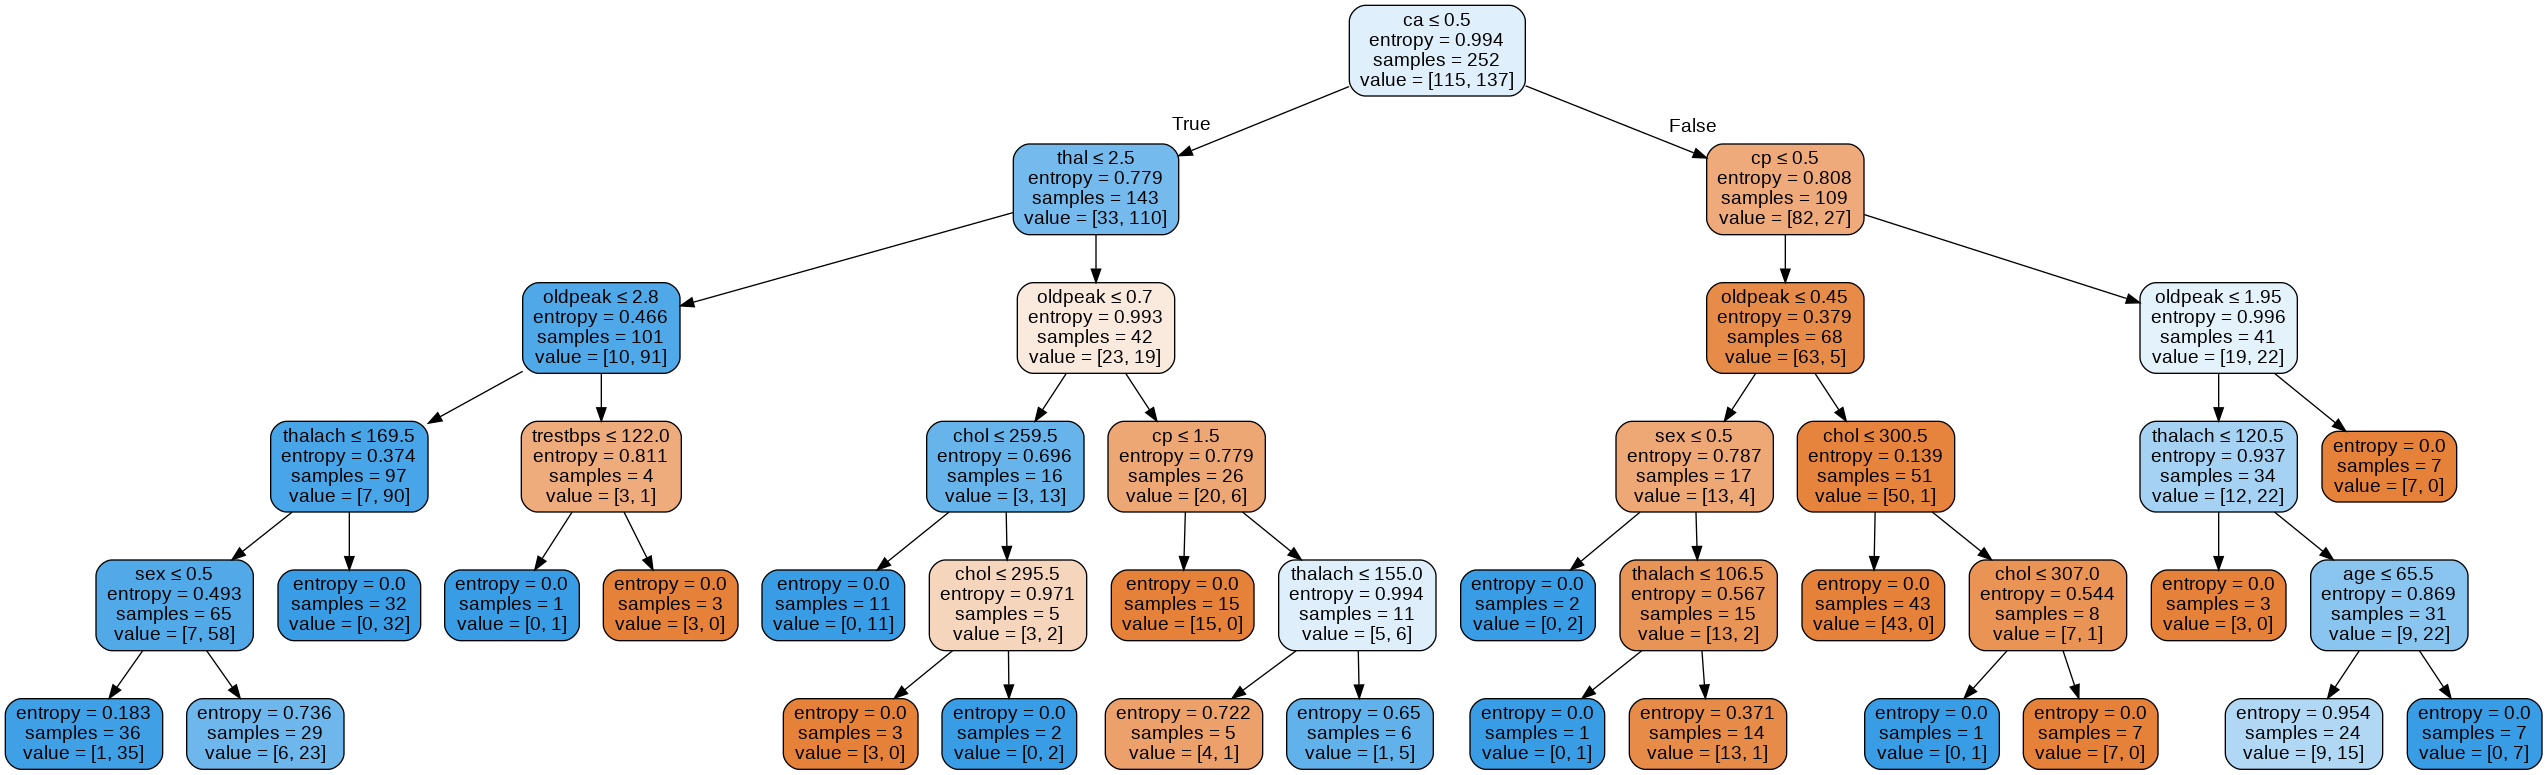

## K-Nearest Neighbours

### Hyperparameter Tuning

In [137]:
param_grid = {'n_neighbors': range(2,20),
          'leaf_size':range(2,16),
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute']}

In [138]:
knn = neighbors.KNeighborsClassifier()
CV_knn = GridSearchCV(estimator= knn, param_grid = param_grid, cv= 5, verbose = 1, n_jobs=-1)
CV_knn.fit(x_train, y_train)

Fitting 5 folds for each of 2016 candidates, totalling 10080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 5756 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 10080 out of 10080 | elapsed:   35.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': range(2, 16), 'n_neighbors': range(2, 20),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [139]:
print(CV_knn.best_params_)
print(CV_knn.best_score_)

{'algorithm': 'auto', 'leaf_size': 2, 'n_neighbors': 19, 'weights': 'uniform'}
0.6704313725490195


### Cross Validation

In [140]:
neighbours = neighbors.KNeighborsClassifier(algorithm= 'auto', leaf_size= 2, n_neighbors=9, weights = 'uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [223]:
scores = cross_val_score(neighbours,x_train,y_train,cv=5)

print('Mean score:',scores.mean())

Mean score: 0.6424313725490196


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

### Fitting the model

In [224]:
neighbours.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [226]:
y_pred = neighbours.predict(x_train)
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       0.72      0.61      0.66       114
         1.0       0.71      0.80      0.76       138

    accuracy                           0.71       252
   macro avg       0.72      0.70      0.71       252
weighted avg       0.71      0.71      0.71       252



In [227]:
y_pred = neighbours.predict(x_test)
knn_acc = acc(y_pred,y_test)

print('Accuracy:',knn_acc)
print('\n')
print(metrics.classification_report(y_test, y_pred))



Accuracy: 0.58


              precision    recall  f1-score   support

         0.0       0.55      0.52      0.53        23
         1.0       0.61      0.63      0.62        27

    accuracy                           0.58        50
   macro avg       0.58      0.58      0.58        50
weighted avg       0.58      0.58      0.58        50



In [228]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.55      0.52      0.53        23
         1.0       0.61      0.63      0.62        27

    accuracy                           0.58        50
   macro avg       0.58      0.58      0.58        50
weighted avg       0.58      0.58      0.58        50



In [229]:
# Accuracy of KNN after excluding 'fbs' and 'chol'

new_features = data[['age','sex','cp','trestbps','restecg','thalach','exang','oldpeak','slope','ca','thal']]
target = data['target']
from sklearn.model_selection import train_test_split

x_train2,x_test2,y_train2,y_test2 = train_test_split(new_features,target,test_size=0.2,random_state=0)

print(x_train2.shape)
print(x_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(242, 11)
(61, 11)
(242,)
(61,)


In [230]:
neighbours.fit(x_train2, y_train2)


KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [231]:
y_pred = neighbours.predict(x_test2)
knn_acc2 = acc(y_pred,y_test2)

print('Accuracy:',knn_acc2)
print('\n')
# Accuracy increases by 7%

Accuracy: 0.6557377049180327




In [232]:
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57        28
           1       0.65      0.79      0.71        33

    accuracy                           0.66        61
   macro avg       0.66      0.64      0.64        61
weighted avg       0.66      0.66      0.65        61



## Support Vector Machines

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  

svm = svm.SVC()
CV_svm = GridSearchCV(estimator= svm, param_grid = param_grid, cv= 5, verbose = 1, n_jobs=-1)
CV_svm.fit(x_train, y_train)
print(CV_svm.best_params_)
print(CV_svm.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.7976470588235294


[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    0.7s finished


In [ ]:
svmc = svm.SVC(C = 100, gamma = 0.0001, kernel = 'rbf')
svmc.fit(x_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svmc.predict(x_train)
metrics.classification_report(y_train, y_pred, output_dict=True)

{'0': {'f1-score': 0.8292682926829269,
  'precision': 0.9444444444444444,
  'recall': 0.7391304347826086,
  'support': 115},
 '1': {'f1-score': 0.882943143812709,
  'precision': 0.8148148148148148,
  'recall': 0.9635036496350365,
  'support': 137},
 'accuracy': 0.8611111111111112,
 'macro avg': {'f1-score': 0.856105718247818,
  'precision': 0.8796296296296295,
  'recall': 0.8513170422088225,
  'support': 252},
 'weighted avg': {'f1-score': 0.8584486680987212,
  'precision': 0.8739711934156378,
  'recall': 0.8611111111111112,
  'support': 252}}

In [ ]:
y_pred = svmc.predict(x_test)
metrics.classification_report(y_test, y_pred, output_dict=True)

{'0': {'f1-score': 0.7000000000000001,
  'precision': 0.7777777777777778,
  'recall': 0.6363636363636364,
  'support': 22},
 '1': {'f1-score': 0.7999999999999999,
  'precision': 0.75,
  'recall': 0.8571428571428571,
  'support': 28},
 'accuracy': 0.76,
 'macro avg': {'f1-score': 0.75,
  'precision': 0.7638888888888888,
  'recall': 0.7467532467532467,
  'support': 50},
 'weighted avg': {'f1-score': 0.7559999999999999,
  'precision': 0.7622222222222222,
  'recall': 0.76,
  'support': 50}}

In [ ]:
metrics.confusion_matrix(y_test, y_pred)

array([[14,  8],
       [ 4, 24]])

### Neural Network

In [233]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization,LeakyReLU
from keras.optimizers import Adam

In [234]:
x_train = np.asarray(x_train).astype('float')
x_test = np.asarray(x_test).astype('float')
y_train = np.asarray(y_train).astype('float')
y_test = np.asarray(y_test).astype('float')

In [235]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(252, 13)
(50, 13)
(252, 1)
(50, 1)


In [236]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [265]:
nn = Sequential()

nn.add(Dense(16,activation='relu',input_shape=(13,)))
nn.add(Dense(32,activation='relu'))
nn.add(Dense(64,activation='relu'))
nn.add(BatchNormalization())

nn.add(Dense(1,activation='sigmoid'))
nn.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_114 (Dense)            (None, 16)                224       
_________________________________________________________________
dense_115 (Dense)            (None, 32)                544       
_________________________________________________________________
dense_116 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_22 (Batc (None, 64)                256       
_________________________________________________________________
dense_117 (Dense)            (None, 1)                 65        
Total params: 3,201
Trainable params: 3,073
Non-trainable params: 128
_________________________________________________________________


In [266]:
nn.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [269]:
nn.fit(x_train,y_train,epochs=70)

Epoch 1/70
8/8 [==============================] - 0s 3ms/step - loss: 0.3775 - accuracy: 0.8452
Epoch 2/70
8/8 [==============================] - 0s 3ms/step - loss: 0.3501 - accuracy: 0.8651
Epoch 3/70
8/8 [==============================] - 0s 3ms/step - loss: 0.3859 - accuracy: 0.8413
Epoch 4/70
8/8 [==============================] - 0s 3ms/step - loss: 0.3796 - accuracy: 0.8452
Epoch 5/70
8/8 [==============================] - 0s 3ms/step - loss: 0.3444 - accuracy: 0.8571
Epoch 6/70
8/8 [==============================] - 0s 3ms/step - loss: 0.3599 - accuracy: 0.8373
Epoch 7/70
8/8 [==============================] - 0s 3ms/step - loss: 0.3867 - accuracy: 0.8413
Epoch 8/70
8/8 [==============================] - 0s 3ms/step - loss: 0.3561 - accuracy: 0.8413
Epoch 9/70
8/8 [==============================] - 0s 3ms/step - loss: 0.3719 - accuracy: 0.8333
Epoch 10/70
8/8 [==============================] - 0s 3ms/step - loss: 0.3726 - accuracy: 0.8532
Epoch 11/70
8/8 [======================

In [270]:
nn.evaluate(x_test,y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.3969 - accuracy: 0.8200


[0.39690762758255005, 0.8199999928474426]

In [ ]:
# Neural Network with feature selection


In [279]:
x_train2 = np.asarray(x_train2).astype('float')
x_test2 = np.asarray(x_test2).astype('float')
y_train2 = np.asarray(y_train2).astype('float')
y_test2 = np.asarray(y_test2).astype('float')

In [288]:
nn = Sequential()

nn.add(Dense(16,activation='relu',input_shape=(11,)))
nn.add(Dense(32,activation='relu'))
nn.add(Dense(64,activation='relu'))
nn.add(BatchNormalization())

nn.add(Dense(1,activation='sigmoid'))
nn.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_134 (Dense)            (None, 16)                192       
_________________________________________________________________
dense_135 (Dense)            (None, 32)                544       
_________________________________________________________________
dense_136 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_27 (Batc (None, 64)                256       
_________________________________________________________________
dense_137 (Dense)            (None, 1)                 65        
Total params: 3,169
Trainable params: 3,041
Non-trainable params: 128
_________________________________________________________________


In [289]:
nn.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [290]:
nn.fit(x_train2,y_train2,epochs=70)

Epoch 1/70
8/8 [==============================] - 1s 3ms/step - loss: 0.9490 - accuracy: 0.4287
Epoch 2/70
8/8 [==============================] - 0s 3ms/step - loss: 0.6560 - accuracy: 0.6116
Epoch 3/70
8/8 [==============================] - 0s 3ms/step - loss: 0.6201 - accuracy: 0.6615
Epoch 4/70
8/8 [==============================] - 0s 3ms/step - loss: 0.5880 - accuracy: 0.6764
Epoch 5/70
8/8 [==============================] - 0s 3ms/step - loss: 0.5812 - accuracy: 0.7116
Epoch 6/70
8/8 [==============================] - 0s 3ms/step - loss: 0.5916 - accuracy: 0.7021
Epoch 7/70
8/8 [==============================] - 0s 3ms/step - loss: 0.5775 - accuracy: 0.6720
Epoch 8/70
8/8 [==============================] - 0s 3ms/step - loss: 0.6100 - accuracy: 0.6832
Epoch 9/70
8/8 [==============================] - 0s 3ms/step - loss: 0.5929 - accuracy: 0.6913
Epoch 10/70
8/8 [==============================] - 0s 3ms/step - loss: 0.5625 - accuracy: 0.7242
Epoch 11/70
8/8 [======================

In [307]:
pred = nn.predict(x_train2)

In [308]:
for i in range(len(pred)):
  if(pred[i]>=0.5):
    pred[i]=1

  else:
    pred[i]=0

In [295]:
pred = nn.predict(x_test2)

In [310]:
nn_acc = acc(pred,y_train2)
print('Accuracy:',nn_acc)

Accuracy: 0.8181818181818182


In [ ]:
print(classification_report(pred,y_test2))

              precision    recall  f1-score   support

         0.0       0.89      0.81      0.85        31
         1.0       0.82      0.90      0.86        30

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [ ]:
print(confusion_matrix(pred,y_test2))

[[25  6]
 [ 3 27]]


In [301]:
for i in range(len(pred)):
  if(pred[i]>=0.5):
    pred[i]=1

  else:
    pred[i]=0

In [303]:
nn_acc = acc(pred,y_test2)
print('Accuracy:',nn_acc)

Accuracy: 0.8524590163934426


In [304]:
print(classification_report(pred,y_test2))

              precision    recall  f1-score   support

         0.0       0.89      0.81      0.85        31
         1.0       0.82      0.90      0.86        30

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [305]:
print(confusion_matrix(pred,y_test2))

[[25  6]
 [ 3 27]]


# Summary

|Model|Cross validation Score |Accuracy without feature selection| Accuracy with feature selection|
| --- | --------------------- | -------------------------------- | ------------------------------ |
|Logistic Regression|0.83|0.86|0.90|
|Random Forest|0.80|0.84|0.88|
|Decision Tree|0.77|0.82|0.78|
|KNearestNeighbors|0.64|0.58|0.65|
|Neural Network||0.82|0.85|